#### Notebook

In [44]:
from pycocotools.coco import COCO
import json
from coco_camera_traps_loader import load_image
import torch
import matplotlib.pyplot as plt
import numpy as np
from torchvision.datasets import CocoDetection
import torch.utils.data as data
from PIL import Image
import os
from coco_camera_traps_loader import CocoCameraTrapsDetection
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
from torch.autograd import Variable
import time
import copy
from barbar import Bar
import torchvision
import math

In [34]:
def show(img):
    img = img[0]
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

In [3]:
json_file = 'lila/SS_S1/SS_S1_val.json'
root = "../../../scratch/zwinzurk/wild/datasets"

In [4]:
dataset = CocoCameraTrapsDetection(root, json_file)
dataloader = DataLoader(dataset, batch_size=32, shuffle=False, num_workers=8)

loading annotations into memory...
Done (t=0.67s)
creating index...
index created!


In [5]:
n_classes = len(dataset.cats)

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else "cpu")

In [7]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained_backbone=False, num_classes=n_classes)

In [8]:
model.to(device)

FasterRCNN(
  (transform): GeneralizedRCNNTransform()
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d()
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d()
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d()
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d()
          (relu): ReLU(inplace=True)
          (downsample): Sequential(
            (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d()
          )
  

In [9]:
for idx, data in enumerate(Bar(dataloader)):
    image = data['image']
    target = data['target']

2890/2890: [===============================>] - ETA 1.9sss


In [ ]:
#model.eval()
#images = data['image'].to(device)
# images = data['image']
# model(images)

In [10]:
images = data['image']
targets = data['target']
image = torch.unsqueeze(data['image'][0], 0)
targets['boxes'] = data['target']['boxes'][0]
targets['image_id'] = torch.unsqueeze(data['target']['image_id'][0], 0)
targets['labels'] = torch.unsqueeze(data['target']['labels'][0], 0)
target = []
target.append(targets)

In [16]:
image = list(i.to(device) for i in image)

In [17]:
target = [{k: v.to(device) for k, v in t.items()} for t in target]

In [26]:
loss_dict = model(image, target)

In [27]:
loss_dict

{'loss_classifier': tensor(3.3827, device='cuda:0', grad_fn=<NllLossBackward>),
 'loss_box_reg': tensor(0., device='cuda:0', grad_fn=<DivBackward0>),
 'loss_objectness': tensor(0.8102, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>),
 'loss_rpn_box_reg': tensor(nan, device='cuda:0', grad_fn=<DivBackward0>)}

In [28]:
losses = sum(loss for loss in loss_dict.values())

In [33]:
loss_value = losses.item()

if not math.isfinite(loss_value):
    print("Loss is {}, stopping training".format(loss_value))
    print(loss_dict)
    sys.exit(1)

Loss is nan, stopping training
{'loss_classifier': tensor(3.3827, device='cuda:0', grad_fn=<NllLossBackward>), 'loss_box_reg': tensor(0., device='cuda:0', grad_fn=<DivBackward0>), 'loss_objectness': tensor(0.8102, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>), 'loss_rpn_box_reg': tensor(nan, device='cuda:0', grad_fn=<DivBackward0>)}


NameError: name 'sys' is not defined

In [53]:
npimg = image[0].cpu().numpy()

In [59]:
img = np.transpose(npimg, (1,2,0)).shape

TypeError: Invalid shape (3,) for image data

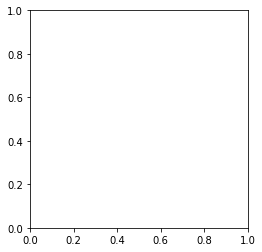

In [60]:
plt.imshow(img)

In [49]:
show(image[0].cpu())

ValueError: axes don't match array

In [36]:
show(data['image'])

TypeError: 'module' object is not subscriptable

In [ ]:
        images = list(image.to(device) for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        loss_dict = model(images, targets)

        losses = sum(loss for loss in loss_dict.values())

In [ ]:
model(image, target)

In [ ]:
model.eval()
model.forward(image)

In [ ]:
t = torch.unsqueeze(targets['boxes'][0])

In [ ]:
t.shape

In [ ]:
model(images, targets)

In [ ]:
targets

In [ ]:
targets

In [ ]:
target_list[]
for i in range(len(targets['image_id'])):
    target_list.append(target)

print(len(targets['boxes']))
print(len(targets['image_id']))
print(len(targets['labels']))
targets['boxes']

In [ ]:
targets = [{k: v for k, v in t} for t in targets]

In [ ]:
model(images,)

In [ ]:
#targets['id'] = [torch.tensor(i) for i in range(len(targets['id']))]
#targets['image_id'] = [torch.tensor(i) for i in range(len(targets['image_id']))]

In [ ]:
images = list(image.to(device) for image in images)
targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

In [ ]:
targets = list(t for t in targets)

In [ ]:
targets

In [ ]:
targets = [{k: v for k, v in t.items()} for t in targets]